## Project 1
##### CSE4224: Intro to ML
Grant Butler

The goal of the project is to take in data about the game Pokemon and predict how a matchup between two of them will result based on two separate models: one based on a set of data that has the two Pokemon's ids and which one of them won a battle between them, and another that is based on their types and stats. 

The goal is to use multiple supervised learning models to create different classifiers that try to predict the results of battles. These models include: *k*-nearest neighbors (kNN), Gaussian Naive Bayes, and Random Forest. Then, the results of all eight of these models' performances will be compared using their confusion matrices.

# Data Collection

A dataset from Kaggle, [Weedle's Cave](https://www.kaggle.com/datasets/terminus7/pokemon-challenge), will be used to train these different models. The data is already prepared and cleaned, so it should be good to go in use for the different models. (Note: this only contains information up to Generation 6 of Pokemon, so it would be possible to try and predict even newer Pokemon based on these models given the stats of the new Pokemon.)

In [19]:
#  ▄█    ▄▄▄▄███▄▄▄▄      ▄███████▄  ▄██████▄     ▄████████     ███        ▄████████
# ███  ▄██▀▀▀███▀▀▀██▄   ███    ███ ███    ███   ███    ███ ▀█████████▄   ███    ███
# ███▌ ███   ███   ███   ███    ███ ███    ███   ███    ███    ▀███▀▀██   ███    █▀
# ███▌ ███   ███   ███   ███    ███ ███    ███  ▄███▄▄▄▄██▀     ███   ▀   ███
# ███▌ ███   ███   ███ ▀█████████▀  ███    ███ ▀▀███▀▀▀▀▀       ███     ▀███████████
# ███  ███   ███   ███   ███        ███    ███ ▀███████████     ███              ███
# ███  ███   ███   ███   ███        ███    ███   ███    ███     ███        ▄█    ███
# █▀    ▀█   ███   █▀   ▄████▀       ▀██████▀    ███    ███    ▄████▀    ▄████████▀
#                                                ███    ███

# math and graphing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# preprocessing
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import recall_score, precision_score, f1_score
import seaborn as sn
from clana.optimize import simulated_annealing

# Models

## Combats-Based Classifiers:

In [20]:
# reading data in:
combats = pd.read_csv('./data/combats.csv')

# get features for training
X = combats.drop(columns=['Winner'])
y = combats['Winner']

# get train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# example of training data:
combats.head()

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


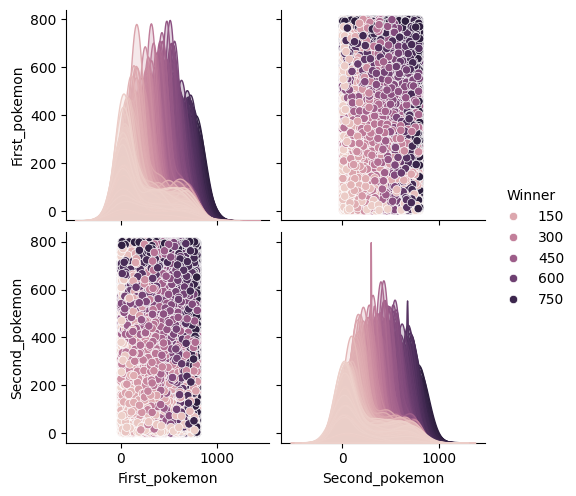

In [21]:
# pair plots:
sn.pairplot(pd.read_csv('./data/combats.csv'), hue='Winner')
plt.show()

### *k*-NN Based on Combats: 
Here I will use *k*-NN to predict the outcomes of the battles, and choose how many number of neighbors (from 1 to 20) by plotting the number of neighbors input vs. the accuracy of each.

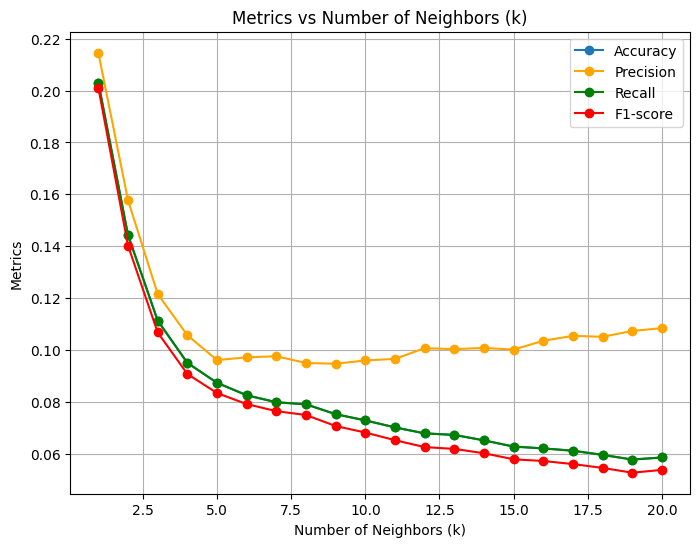

In [4]:
# get k values to try
k_values = range(1, 21)
accuracies = []
precisions = []
recalls = []
f1s = []

for k in k_values:
    # train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # make y_pred
    y_pred = knn.predict(X_test)

    # calculate scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # append them
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

plt.figure(figsize=(8, 6))

# Plot accuracies
plt.plot(k_values, accuracies, marker='o', label='Accuracy')

# Plot precisions
plt.plot(k_values, precisions, marker='o', color='orange', label='Precision')

# Plot recalls
plt.plot(k_values, recalls, marker='o', color='green', label='Recall')

# Plot F1-scores
plt.plot(k_values, f1s, marker='o', color='red', label='F1-score')

# Add labels and legend
plt.title('Metrics vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metrics')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.29      0.18      0.22        11
           3       0.17      0.25      0.21        16
           4       0.19      0.25      0.21        12
           5       0.25      0.25      0.25         8
           6       0.25      0.11      0.15         9
           7       0.29      0.19      0.23        31
           8       0.29      0.43      0.35        23
           9       0.41      0.35      0.38        20
          10       0.00      0.00      0.00         3
          11       0.23      0.27      0.25        11
          13       0.25      0.28      0.26        18
          14       1.00      0.25      0.40         4
          15       0.00      0.00      0.00         2
          16       0.53      0.38      0.44        21
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         3
     

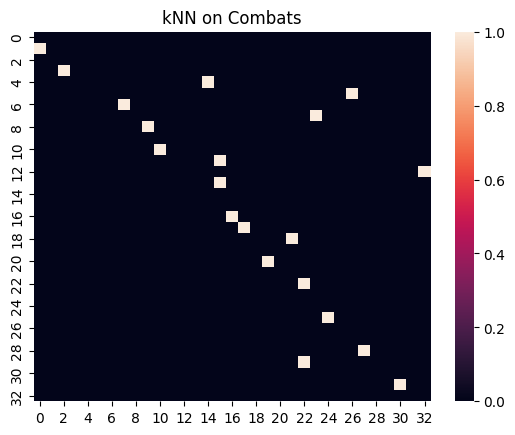

In [24]:
# k = 1 performed the best, so lets use that
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# calculate scores
print(f'Classification Report\n{classification_report(y_test, y_pred, zero_division=1)}')

sample_index = np.random.choice(len(y_test), size=20, replace=False)
y_test_sample = y_test.iloc[sample_index]
y_pred_sample = y_pred[sample_index]

# plot confusion matrix
sn.heatmap(confusion_matrix(y_test_sample, y_pred_sample), annot=False)
plt.title('kNN on Combats')
plt.show()

### GaussianNB based on Combats:

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         6
           2       1.00      0.00      0.00        11
           3       1.00      0.00      0.00        16
           4       1.00      0.00      0.00        12
           5       1.00      0.00      0.00         8
           6       1.00      0.00      0.00         9
           7       1.00      0.00      0.00        31
           8       1.00      0.00      0.00        23
           9       1.00      0.00      0.00        20
          10       1.00      0.00      0.00         3
          11       1.00      0.00      0.00        11
          13       1.00      0.00      0.00        18
          14       1.00      0.00      0.00         4
          15       1.00      0.00      0.00         2
          16       1.00      0.00      0.00        21
          17       1.00      0.00      0.00         5
          18       1.00      0.00      0.00         3
     

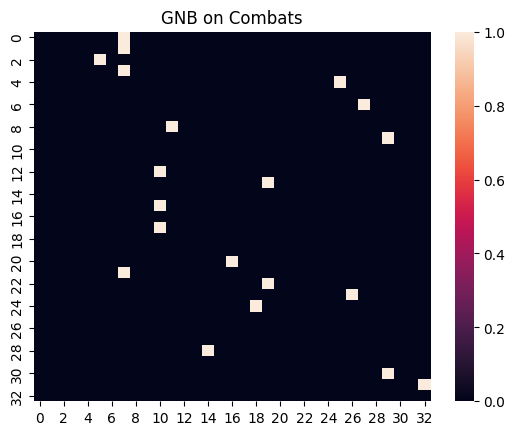

In [25]:
# train Gaussian NB classifier based on combat data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predict outcomes
y_pred = gnb.predict(X_test)

# calculate scores
print(f'Classification Report\n{classification_report(y_test, y_pred, zero_division=1)}')

sample_index = np.random.choice(len(y_test), size=20, replace=False)
y_test_sample = y_test.iloc[sample_index]
y_pred_sample = y_pred[sample_index]

# plot confusion matrix
sn.heatmap(confusion_matrix(y_test_sample, y_pred_sample), annot=False)
plt.title('GNB on Combats')
plt.show()

### Random Forest on Combat Data:

Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.33      0.33         6
           2       0.50      0.45      0.48        11
           3       0.67      0.75      0.71        16
           4       0.44      0.58      0.50        12
           5       0.38      0.38      0.38         8
           6       0.40      0.44      0.42         9
           7       0.93      0.87      0.90        31
           8       0.83      0.87      0.85        23
           9       0.86      0.90      0.88        20
          10       0.50      0.33      0.40         3
          11       0.43      0.55      0.48        11
          13       0.61      0.61      0.61        18
          14       0.20      0.25      0.22         4
          15       0.00      0.00      0.00         2
          16       0.59      0.76      0.67        21
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         3
    

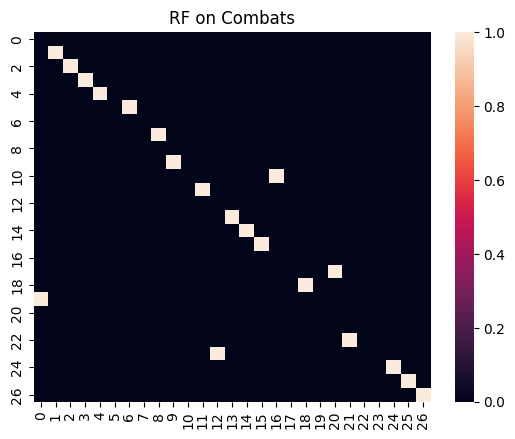

In [26]:
# train RF on the data.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predictions
y_pred = rf.predict(X_test)

print(f'Classification Report:\n{classification_report(y_test, y_pred, zero_division=1)}')

sample_index = np.random.choice(len(y_test), size=20, replace=False)
y_test_sample = y_test.iloc[sample_index]
y_pred_sample = y_pred[sample_index]

# plot confusion matrix
sn.heatmap(confusion_matrix(y_test_sample, y_pred_sample), annot=False)
plt.title('RF on Combats')
plt.show()

## Stat-based Classifiers:

In [27]:
# getting stat data:
pokemon = pd.read_csv('./data/pokemon.csv')

# remove non-numeric data
pokemon = pokemon.drop(columns=["Name", "Type 1", "Type 2"])
pokemon.head()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,45,49,49,65,65,45,1,False
1,2,60,62,63,80,80,60,1,False
2,3,80,82,83,100,100,80,1,False
3,4,80,100,123,122,120,80,1,False
4,5,39,52,43,60,50,65,1,False


In [28]:
# Combine the stats information with the given combat data:
combat_stats = pd.merge(combats, pokemon, left_on='First_pokemon', right_on='#', how='left')
combat_stats.rename(columns=lambda x: f"{x}_first" if x in pokemon.columns else x, inplace=True)
combat_stats = pd.merge(combat_stats, pokemon, left_on="Second_pokemon", right_on="#", how="left")
combat_stats.rename(columns=lambda x: f"{x}_second" if x in pokemon.columns else x, inplace=True)
combat_stats.drop(["#_first", "#_second"], axis=1, inplace=True)

combat_stats.head()

,First_pokemon,Second_pokemon,Winner,HP_first,Attack_first,Defense_first,Sp. Atk_first,Sp. Def_first,Speed_first,Generation_first,Legendary_first,HP_second,Attack_second,Defense_second,Sp. Atk_second,Sp. Def_second,Speed_second,Generation_second,Legendary_second
0,266,298,298,50,64,50,45,50,41,2,False,70,70,40,60,40,60,3,False
1,702,701,701,91,90,72,90,129,108,5,True,91,129,90,72,90,108,5,True
2,191,668,668,55,40,85,80,105,40,2,False,75,75,75,125,95,40,5,False
3,237,683,683,40,40,40,70,40,20,2,False,77,120,90,60,90,48,5,False
4,151,231,151,70,60,125,115,70,55,1,False,20,10,230,10,230,5,2,False


In [29]:
# grab the features and target
X = combat_stats.drop(columns=['Winner'])
y = combat_stats['Winner']

# encode the True and False as 1 and 0
X['Legendary_first'] = LabelEncoder().fit_transform(X['Legendary_first'])
X['Legendary_second'] = LabelEncoder().fit_transform(X['Legendary_second'])

# get split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### *k*-NN on Stats:

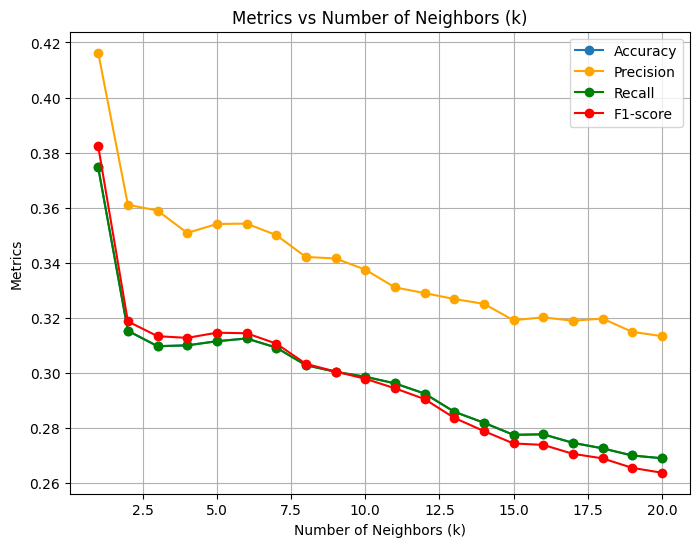

In [11]:
# get k values to try
k_values = range(1, 21)
accuracies = []
precisions = []
recalls = []
f1s = []

for k in k_values:
    # train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # make y_pred
    y_pred = knn.predict(X_test)

    # calculate scores
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    # append them
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

plt.figure(figsize=(8, 6))

# Plot accuracies
plt.plot(k_values, accuracies, marker='o', label='Accuracy')

# Plot precisions
plt.plot(k_values, precisions, marker='o', color='orange', label='Precision')

# Plot recalls
plt.plot(k_values, recalls, marker='o', color='green', label='Recall')

# Plot F1-scores
plt.plot(k_values, f1s, marker='o', color='red', label='F1-score')

# Add labels and legend
plt.title('Metrics vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Metrics')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

Again, using k = 1 seems to be the best option.

Classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.33      0.27      0.30        11
           3       0.53      0.50      0.52        16
           4       0.29      0.42      0.34        12
           5       0.23      0.38      0.29         8
           6       0.21      0.33      0.26         9
           7       0.61      0.35      0.45        31
           8       0.71      0.87      0.78        23
           9       1.00      0.60      0.75        20
          10       0.00      0.00      0.00         3
          11       0.33      0.36      0.35        11
          13       0.57      0.44      0.50        18
          14       0.17      0.25      0.20         4
          15       1.00      0.00      0.00         2
          16       0.50      0.38      0.43        21
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         3
     

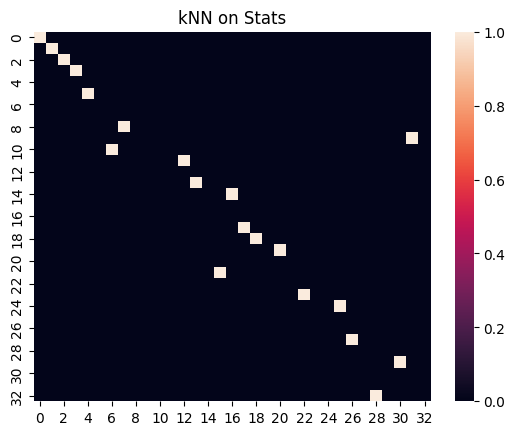

In [30]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# calculate scores
print(f'Classification Report\n{classification_report(y_test, y_pred, zero_division=1)}')

sample_index = np.random.choice(len(y_test), size=20, replace=False)
y_test_sample = y_test.iloc[sample_index]
y_pred_sample = y_pred[sample_index]

# plot confusion matrix
sn.heatmap(confusion_matrix(y_test_sample, y_pred_sample), annot=False)
plt.title('kNN on Stats')
plt.show()

### Gaussian Naive Bayers on Stats:

Classification Report
              precision    recall  f1-score   support

           1       0.05      0.33      0.09         6
           2       1.00      0.00      0.00        11
           3       1.00      0.00      0.00        16
           4       1.00      0.00      0.00        12
           5       1.00      0.00      0.00         8
           6       1.00      0.00      0.00         9
           7       0.07      0.03      0.04        31
           8       0.00      0.00      0.00        23
           9       1.00      0.00      0.00        20
          10       1.00      0.00      0.00         3
          11       0.14      0.09      0.11        11
          13       0.18      0.89      0.30        18
          14       0.20      0.50      0.29         4
          15       0.00      0.00      0.00         2
          16       0.08      0.19      0.11        21
          17       0.00      0.00      0.00         5
          18       0.17      0.33      0.22         3
     

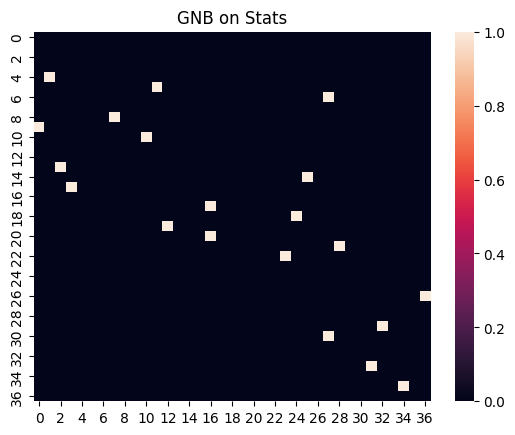

In [31]:
# train Gaussian NB classifier based on combat data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# predict outcomes
y_pred = gnb.predict(X_test)

# calculate scores
print(f'Classification Report\n{classification_report(y_test, y_pred, zero_division=1)}')

sample_index = np.random.choice(len(y_test), size=20, replace=False)
y_test_sample = y_test.iloc[sample_index]
y_pred_sample = y_pred[sample_index]

# plot confusion matrix
sn.heatmap(confusion_matrix(y_test_sample, y_pred_sample), annot=False)
plt.title('GNB on Stats')
plt.show()

### Random Forests on Stats:

Classification Report:
              precision    recall  f1-score   support

           1       0.55      1.00      0.71         6
           2       0.79      1.00      0.88        11
           3       0.89      1.00      0.94        16
           4       0.80      1.00      0.89        12
           5       0.60      0.75      0.67         8
           6       0.73      0.89      0.80         9
           7       1.00      0.97      0.98        31
           8       0.88      1.00      0.94        23
           9       0.95      0.90      0.92        20
          10       1.00      0.33      0.50         3
          11       0.85      1.00      0.92        11
          13       1.00      1.00      1.00        18
          14       0.43      0.75      0.55         4
          15       0.33      0.50      0.40         2
          16       0.86      0.90      0.88        21
          17       0.67      0.80      0.73         5
          18       0.17      0.33      0.22         3
    

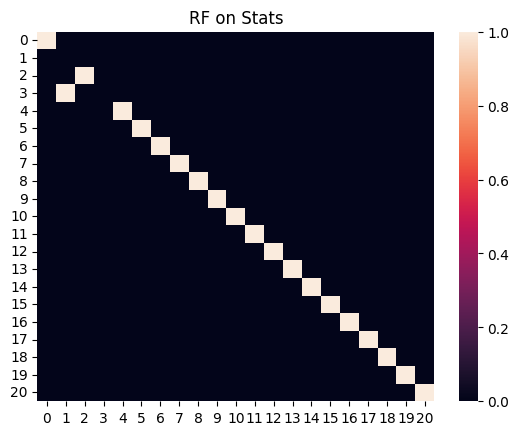

In [32]:
# train RF on the data.
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predictions
y_pred = rf.predict(X_test)

print(f'Classification Report:\n{classification_report(y_test, y_pred, zero_division=1)}')

sample_index = np.random.choice(len(y_test), size=20, replace=False)
y_test_sample = y_test.iloc[sample_index]
y_pred_sample = y_pred[sample_index]

# plot confusion matrix
sn.heatmap(confusion_matrix(y_test_sample, y_pred_sample), annot=False)
plt.title('RF on Stats')
plt.show()

# Analysis and Conclusions

#### Accuracy of Models:

|     Model     | Accuracy on Combat | Accuracy on Stats |
| :-----------: | :----------------: | :---------------: |
|    _k_-NN     |        0.20        |       0.37        |
|  Gaussian NB  |        0.01        |       0.13        |
| Random Forest |        0.45        |       0.85        |

#### Confusion Matrices of Models:
![](assets/models_cm.png)

Using the confusion matrix and model accuracies, it is apparent that Gaussian Naive Bayers had the worst performance, the *k*-NN's performance was middling, and the Random Forests classifier by far was the most accurate. Even with this small amount of data, the Random Forest was able to predict about half of the time what the proper answer was with only the combat data, and with the stats it was able to predict much better.

Perhaps with a bigger data set, these can be even more accurate, but something like XGBoost might be able to push the classifier into correct predictions much more often. Even so, Random Forest was able to get fairly good performance with this small data set.